# Top 5 Leagues Historical Goals: Statistical Insight

## Top 5 Leagues Historical Goals: France recent increase in goals

### Import relevant libraries

In [211]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import linregress

### Load the CSV file with the data

In [212]:
# Read Top 5 Leagues 25 Countries CSV file
df = pd.read_csv(r"C:\Users\jprey\OneDrive\Escritorio\JP\KUL\5th Semester (Polimi)\MIT IDSS\Practice Projects\Top 5 Leagues\top_5_leagues_25_countries_cumulative.csv")
df.head()

,Countries,1963-1964,1964-1965,1965-1966,1966-1967,1967-1968,1968-1969,1969-1970,1970-1971,1971-1972,...,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023,2023-2024,sum
0,Germany,830,760,953,845,913,776,881,869,940,...,360,360,390,384,364,351,365,419,440,39164
1,England,1132,1061,953,895,982,890,836,736,783,...,297,291,275,284,366,372,358,387,459,37995
2,France,721,701,967,801,771,585,699,759,788,...,552,603,515,614,493,614,700,681,568,37713
3,Spain,495,495,499,578,576,491,516,474,596,...,573,647,584,608,600,613,618,503,546,34409
4,Italy,373,457,466,468,383,415,396,423,427,...,439,472,431,417,424,374,392,310,321,27814


In [213]:
# Create a sub-dataframe that includes only the 5 nations with the most overall goals between 1994-2004
thirty_years_ago = df.iloc[:5, [0,32,33,34,35,36,37,38,39,40,41]]
# Add a column with its mean, use np.floor to avoid fractional goals.
thirty_years_ago['Mean'] = np.floor(thirty_years_ago.iloc[:, 1:].mean(axis=1))
# Make it an int.
thirty_years_ago["Mean"] = thirty_years_ago["Mean"].astype(int)

# Create a sub-dataframe that includes only the 5 nations with the most overall goals between 2004-2014
previous_ten_years = df.iloc[:5, [0,42,43,44,45,46,47,48,49,50,51]]
# Add a column with its mean, use np.floor to avoid fractional goals.
previous_ten_years['Mean'] = np.floor(previous_ten_years.iloc[:, 1:].mean(axis=1))
# Make it an int.
previous_ten_years["Mean"] = previous_ten_years["Mean"].astype(int)

# Create a sub-dataframe that includes only the 5 nations with the most overall goals between 2014-2024
these_ten_years = df.iloc[:5,[0,52,53,54,55,56,57,58,59,60,61]]
# Add a column with its mean, use np.floor to avoid fractional goals.
these_ten_years['Mean'] = np.floor(these_ten_years.iloc[:, 1:].mean(axis=1))
# Make it an int.
these_ten_years["Mean"] = these_ten_years["Mean"].astype(int)


In [214]:
thirty_years_ago

,Countries,1994-1995,1995-1996,1996-1997,1997-1998,1998-1999,1999-2000,2000-2001,2001-2002,2002-2003,2003-2004,Mean
0,Germany,695,593,572,563,508,445,403,361,269,302,471
1,England,779,604,541,489,437,433,422,397,361,346,480
2,France,670,616,671,568,565,558,525,555,577,570,587
3,Spain,558,734,638,402,469,559,617,560,564,552,565
4,Italy,487,544,568,611,489,463,503,518,538,518,523


In [215]:
previous_ten_years

,Countries,2004-2005,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,Mean
0,Germany,317,327,302,292,295,312,348,365,437,390,338
1,England,367,355,323,327,310,342,320,323,290,320,327
2,France,482,438,443,519,503,457,467,507,584,531,493
3,Spain,513,491,457,500,587,574,513,546,626,619,542
4,Italy,635,626,673,664,616,569,522,475,488,474,574


In [216]:
these_ten_years

,Countries,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023,2023-2024,Mean
0,Germany,370,360,360,390,384,364,351,365,419,440,380
1,England,297,297,291,275,284,366,372,358,387,459,338
2,France,514,552,603,515,614,493,614,700,681,568,585
3,Spain,556,573,647,584,608,600,613,618,503,546,584
4,Italy,433,439,472,431,417,424,374,392,310,321,401


### Extract the data relevant to France

In [217]:
# Extract the France values for the seasons 2004-2014 in a dataframe
france_previous_ten_years = previous_ten_years.iloc[2:3, [1,2,3,4,5,6,7,8,9,10]].iloc[0]
# Extract the France values for the seasons 2014-2024 in a dataframe
france_these_ten_years = these_ten_years.iloc[2:3, [1,2,3,4,5,6,7,8,9,10]].iloc[0]

### T-test for two samples

We want to perform a t-test for two samples to check whether the mean goals of France have increased in these last 10 years compared to the previous last 10 years (2004-2014). To do so, we have to make sure that:
- The samples are independent between each other and random
    - This is true because each year has different goals that do not depend on historical data. Moreover, the goals scored per season can be approximated to random since they depend on the players' performance year by year.
- The samples are assumed to be normally distributed
    - A Shapiro-Wilk test will be performed to determine this.
- The variances are equal.
    - Levene's test can be performed to determine this.

**We will consider a level of significance of 0.01**

In [218]:
# Set alpha as a global variable.
alpha = 0.01

#### Assess for normality: Shapiro-Wilk test
For each sample: if the p-value is higher than alpha, then the null hypothesis stating that the sample follows a normal distribution cannot be rejected, i.e., the sample is normally distributed if p-value > alpha.

In [219]:
# Shapiro test parameters for the previous last ten years (2004-2014)
shapiro_france_previous_ten_years = stats.shapiro(france_previous_ten_years)
p_value_previous_ten_years = shapiro_france_previous_ten_years.pvalue
print("Shapiro-Wilk Test for France's goals from 2004 to 2014: W =", shapiro_france_previous_ten_years.statistic, ", p-value =", p_value_previous_ten_years)

# Shapiro test parameters for this last ten years (2014-2024)
shapiro_france_these_ten_years = stats.shapiro(france_these_ten_years)
p_value_these_ten_years = shapiro_france_these_ten_years.pvalue
print("Shapiro-Wilk Test for France's goals from 2014 to 2024: W =", shapiro_france_these_ten_years.statistic, ", p-value =", p_value_these_ten_years)

# Conclusion
print("Both samples are normally distributed?", p_value_previous_ten_years > alpha and p_value_these_ten_years > alpha)



Shapiro-Wilk Test for France's goals from 2004 to 2014: W = 0.9478259459792676 , p-value = 0.6428542654489622
Shapiro-Wilk Test for France's goals from 2014 to 2024: W = 0.9403216198196231 , p-value = 0.556597672066893
Both samples are normally distributed? True


##### Therefore, the samples are normally distributed.

#### Assess for equal variances: Levene's test
We execute the test simultaneously for both samples: if the p-value is higher than alpha, then the null hypothesis stating that the variances of the samples are equal cannot be rejected, i.e., the samples' variances are equal if p-value > alpha.

In [220]:
# We execute Levene's test using our two datasets.
levene_test = stats.levene(france_previous_ten_years, france_these_ten_years)
p_value_levene_test = levene_test.pvalue
print("Levene's Test for both samples: Statistic =", levene_test.statistic, ", p-value =", p_value_levene_test)

# Conclusion
print("Both samples' variances are equal?", p_value_levene_test > alpha)

Levene's Test for both samples: Statistic = 2.358587346422444 , p-value = 0.14198606565081504
Both samples' variances are equal? True


##### Therefore, the samples' variances are equal.

#### The samples are independent, randomly selected, uniformly distributed and have equal variances.

### Let's perform the t-test for two samples
- **Null Hypothesis (H<sub>0</sub>)**: μ<sub>previous</sub> >= μ<sub>this</sub> (the mean of the goals scored by French players in the top 5 European Football Leagues between the seasons 2003-2024 and 2013-2024 is greater than or equal to the mean of the seasons 2013-2014 to 2023-2024)
- **Alternative Hypothesis (H<sub>a</sub>)**: μ<sub>previous</sub> < μ<sub>this</sub> (the mean of the goals scored by French players in the top 5 European Football Leagues between the seasons 2003-2024 and 2013-2024 is less than the mean of the seasons 2013-2014 to 2023-2024)

In [221]:
# Using scipy module stats, a statistical test is perfroemd.
t_statistic, p_value = stats.ttest_ind(france_previous_ten_years, france_these_ten_years, alternative="less")
print("p-value =", p_value)
print("Reject the null hypothesis in favor of the alternative hypothesis?",p_value < alpha)

p-value = 0.001274605152448159
Reject the null hypothesis in favor of the alternative hypothesis? True


### We are Sure with a 99% Confidence Level that the mean of goals scored of French players in Europe Top 5 Football leagues has increased in these last 10 years with resepct to the previous last 10 years (2004-2014)

## Top 5 Leagues Historical Goals: France vs Germany

### Let's predict when is France surpassing Germany.

#### France players have score more goals this last decade with respect to the previous one... does that mean that this trend will continue?
- Although computers and AI can do a lot for the Data Science domain, there is always the need for human insight. For example, it is true that France players have scored more this last decade, but does this mean that there will be a new increase the next decade? This is why it is very important to consider as much data as possible. In fact, this is why there is a different test for distributions of more than 30 samples.
- If we had only consider the previous result, we would have assumed an increase for the next decade, or we could have thought that it is reasonable to consider the average of the lsat decade only. However, this is a bad approximation. Goals scored by players per nation naturally vary throughout time.
- Modern football (the last 30 years) has become a more defensive game, leading to less goals. Moreover, globalization of the sport has brought great players from different countries, reducing the total sum of this historically frequent scoring countries.
- This will be shown in the next graph

From 1963-1993, on average, the top 5 countries scored 198 goals than in the past 30 years.


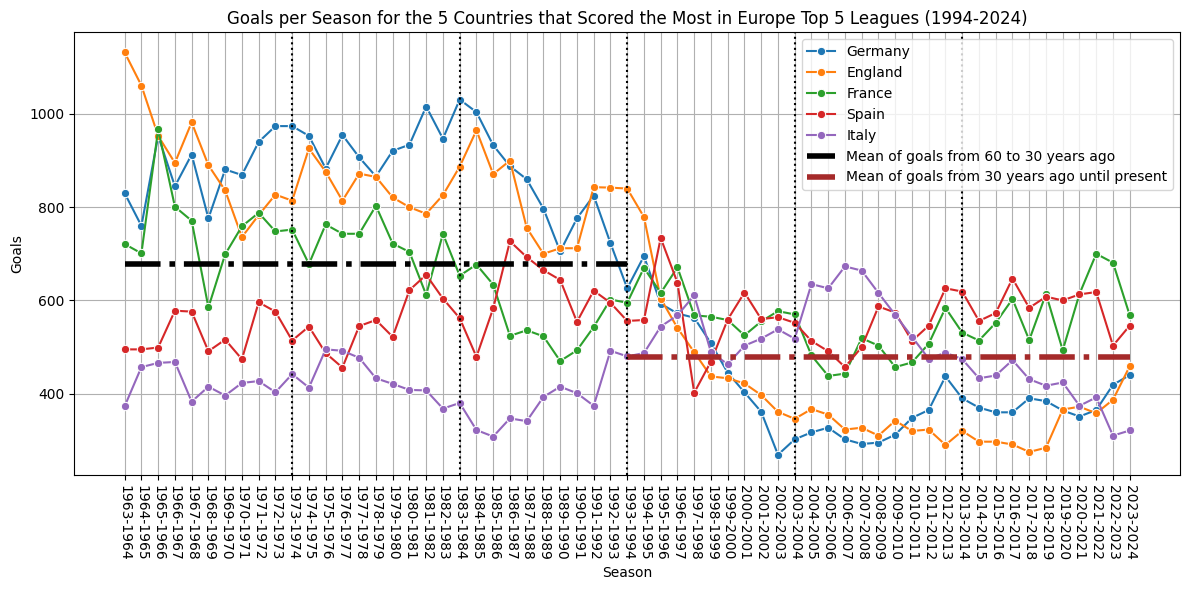

In [222]:
# Reshape the DataFrame using melt
# df_melted = df.iloc[:5, [0,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61]].melt(id_vars='Countries', var_name='Season', value_name='Goals')
df_melted = df.iloc[:5, :-1].melt(id_vars='Countries', var_name='Season', value_name='Goals')
average_60_to_30_years_ago_top_countries = df.iloc[0:5, 1:32].mean().mean()
average_30_to_present = df.iloc[0:5, 32:-1].mean().mean()
print("From 1963-1993, on average, the top 5 countries scored", int(np.floor(average_60_to_30_years_ago_top_countries-average_30_to_present)), "goals than in the past 30 years.")
# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='Season', y='Goals', hue='Countries', marker='o')

# Customize the plot
plt.title('Goals per Season for the 5 Countries that Scored the Most in Europe Top 5 Leagues (1994-2024)')
plt.xticks(rotation=-90)
plt.ylabel('Goals')
plt.xlabel('Season')
plt.legend(title='Country')
plt.hlines(y=average_60_to_30_years_ago_top_countries, xmin="1963-1964", xmax="1993-1994", label="Mean of goals from 60 to 30 years ago", color='black', linestyle='-.', linewidth=4)
plt.hlines(y=average_30_to_present, xmin="1993-1994", xmax="2023-2024", label="Mean of goals from 30 years ago until present", color='brown', linestyle='-.', linewidth=4)
plt.axvline(x="1973-1974", color="black", linestyle='dotted')
plt.axvline(x="1983-1984", color="black", linestyle='dotted')
plt.axvline(x="1993-1994", color="black", linestyle='dotted')
plt.axvline(x="2003-2004", color="black", linestyle='dotted')
plt.axvline(x="2013-2014", color = "black", linestyle='dotted')
plt.grid()
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

##### As shown in the graph, there is a clear difference in these last 30 years compare to the previous ones.
- Moreover, the graphs seems to have stabilized.


#### Which nation will be on top by the next decade?
It would be interesting to consider the cumulative goals in the top 5 leagues since the birth of the most recent league (Bundesliga).

In [223]:
# Cumulative goals since 1963-1964. Table sorted by total sum
df.iloc[:, [0,62]].sort_values("sum", ascending = False).head()

,Countries,sum
0,Germany,39164
1,England,37995
2,France,37713
3,Spain,34409
4,Italy,27814


##### Germany is on top currently, but how likely is it for them to stay on the top for another decade?
Let's dive deeper into the average goals scored per decade these last years.

In [224]:
means_table = pd.concat([thirty_years_ago.iloc[:, [0,-1]], previous_ten_years.iloc[:, [-1]], these_ten_years.iloc[:, [-1]]], axis=1)
means_table.columns = ["Countries", "Mean 30-20 years ago", "Mean 20-10 years ago", "Mean 10 years ago to present"]
means_table["Mean Modern Football"] = np.floor(means_table.iloc[:, 1:].mean(axis=1))
means_table["Mean Modern Football"] = means_table["Mean Modern Football"].astype(int)
means_table = means_table.sort_values("Mean Modern Football", ascending = False)
means_table.reset_index(drop=True, inplace=True)
means_table

,Countries,Mean 30-20 years ago,Mean 20-10 years ago,Mean 10 years ago to present,Mean Modern Football
0,Spain,565,542,584,563
1,France,587,493,585,555
2,Italy,523,574,401,499
3,Germany,471,338,380,396
4,England,480,327,338,381


##### Who could dethrone Germany in the next decade?
- Cumulative table showed:
    1. Germany has 39164 goals
    2. England has 37995 goals
    3. France has 37713 goals
    4. Spain has 34409 goals
    5. Italy has 27814 goals
- England has had less goals on average this past 30 years per season than Germany. It cannot beat Germany.
- Italy is more than 12000 goals away, it cannot be Italy.
- Spain and France have scored on average the same amount of goals per season (± 9 goals) in these last 30 years